In [292]:
from tqdm import tqdm
import numpy as np
from pandas import Series, DataFrame

In [605]:
headlines_f1 = ['Идентификатор строки', 'Месяц признания безработным', 'Номер недели признания безработным', 'Пол', 'Возраст', 'Категория лиц, испытывающих трудности (отнесенность к одной или нескольким категориям)', 'Категория лиц, испытывающих трудности: «Повторно обратившийся»', 'Категория лиц, испытывающих трудности: «Ранее не работавшие»', 'Категория лиц, испытывающих трудности: «Предпенсионный возраст»', 'Категория лиц, испытывающих трудности: «Многодетные родители»', 'Категория лиц, испытывающих трудности: «Завершившие обучение по направлению службы занятости»', 'Категория лиц, испытывающих трудности: «Разведен (разведена)»', 'Категория лиц, испытывающих трудности: «Одинокие родители»', 'Категория лиц, испытывающих трудности: «Высвобождаемые работники»', 'Категория лиц, испытывающих трудности: «Малоимущие граждане, заключившие социальный контракт»', 'Категория (основание) незанятости', 'Месяц и год наступления категории незанятости', 'Месяц прекращения занятости', 'Уровень образования', 'Год выпуска из учебного заведения (последнего)', 'Профессия по последнему образованию', 'Регион', 'Федеральный округ', 'Трудовой стаж за последние 12 месяцев в количестве интервалов по 5 недель', 'Средняя заработная плата за последние 3 месяца по последнему месту работы в рублях', 'Профессия по последнему месту работы', 'Причина увольнения с последнего места работы' , 'Месяц увольнения с последнего места работы', 'Факт направления на профессиональное обучение', 'Специальность профессионального обучения', 'Продолжительность профессионального обучения', 'Количество направлений на работу', 'Количество отказов клиента от направления на работу', 'Количество отказов от подходящей работы', 'Количество отказов работодателя', 'Размер желаемой заработной платы', 'Характер работы трудоустройства', 'Режим работы трудоустройства', 'Месяц трудоустройства', 'Неделя трудоустройства', 'Профессия трудоустройства', 'Месяц закрытия (снятия с учета в качестве ищущего работу)', 'Причина снятия гражданина с учета в качества ищущего работу', 'Месяц завершения работы с гражданином', 'Причина завершения работы с гражданином']


# Расшифровка параметра age - возраст гражданина на момент подачи заявления. Возраст сгруппирован в следующие интервалы:
age_encode = {1 : '16-17 лет',
2 : 'от 18 до 22',
3 : 'от 23 до 27',
4 : 'от 28 до 32',
5 : 'от 33 до 37',
6 : 'от 38 до 42',
7 : 'от 43 до 47',
8 : 'от 48 до 52',
9 : '53-54 года',
10 : '55 лет',
11 : '56 лет',
12 : '57 лет',
13 : '58 лет',
14 : '59 лет',
15 : '60 лет',
16 :' больше 60 лет'}


In [421]:
print(headlines_f1.index('Пол'))

3


In [468]:
headlines_f1_keys = []
for i,s in enumerate(headlines_f1):
    headlines_f1_keys.append(s.replace(' ', '_').replace('(', '_').replace(')', '_').replace('"', '_').replace('-', '_').replace('«', '_').replace('»', '_').replace(':', '_').replace(',', '_'))
    print(headlines_f1_keys[i])



Идентификатор_строки
Месяц_признания_безработным
Номер_недели_признания_безработным
Пол
Возраст
Категория_лиц__испытывающих_трудности__отнесенность_к_одной_или_нескольким_категориям_
Категория_лиц__испытывающих_трудности___Повторно_обратившийся_
Категория_лиц__испытывающих_трудности___Ранее_не_работавшие_
Категория_лиц__испытывающих_трудности___Предпенсионный_возраст_
Категория_лиц__испытывающих_трудности___Многодетные_родители_
Категория_лиц__испытывающих_трудности___Завершившие_обучение_по_направлению_службы_занятости_
Категория_лиц__испытывающих_трудности___Разведен__разведена__
Категория_лиц__испытывающих_трудности___Одинокие_родители_
Категория_лиц__испытывающих_трудности___Высвобождаемые_работники_
Категория_лиц__испытывающих_трудности___Малоимущие_граждане__заключившие_социальный_контракт_
Категория__основание__незанятости
Месяц_и_год_наступления_категории_незанятости
Месяц_прекращения_занятости
Уровень_образования
Год_выпуска_из_учебного_заведения__последнего_
Профессия_по_посл

['Идентификатор строки',
 'Месяц признания безработным',
 'Номер недели признания безработным',
 'Пол',
 'Возраст',
 'Категория лиц, испытывающих трудности (отнесенность к одной или нескольким категориям)',
 'Категория лиц, испытывающих трудности: «Повторно обратившийся»',
 'Категория лиц, испытывающих трудности: «Ранее не работавшие»',
 'Категория лиц, испытывающих трудности: «Предпенсионный возраст»',
 'Категория лиц, испытывающих трудности: «Многодетные родители»',
 'Категория лиц, испытывающих трудности: «Завершившие обучение по направлению службы занятости»',
 'Категория лиц, испытывающих трудности: «Разведен (разведена)»',
 'Категория лиц, испытывающих трудности: «Одинокие родители»',
 'Категория лиц, испытывающих трудности: «Высвобождаемые работники»',
 'Категория лиц, испытывающих трудности: «Малоимущие граждане, заключившие социальный контракт»',
 'Категория (основание) незанятости',
 'Месяц и год наступления категории незанятости',
 'Месяц прекращения занятости',
 'Уровень об

In [430]:
for i,n in enumerate(headlines_f1):
    print(i,n)

0 Идентификатор строки
1 Месяц признания безработным
2 Номер недели признания безработным
3 Пол
4 Возраст
5 Категория лиц, испытывающих трудности (отнесенность к одной или нескольким категориям)
6 Категория лиц, испытывающих трудности: «Повторно обратившийся»
7 Категория лиц, испытывающих трудности: «Ранее не работавшие»
8 Категория лиц, испытывающих трудности: «Предпенсионный возраст»
9 Категория лиц, испытывающих трудности: «Многодетные родители»
10 Категория лиц, испытывающих трудности: «Завершившие обучение по направлению службы занятости»
11 Категория лиц, испытывающих трудности: «Разведен (разведена)»
12 Категория лиц, испытывающих трудности: «Одинокие родители»
13 Категория лиц, испытывающих трудности: «Высвобождаемые работники»
14 Категория лиц, испытывающих трудности: «Малоимущие граждане, заключившие социальный контракт»
15 Категория (основание) незанятости
16 Месяц и год наступления категории незанятости
17 Месяц прекращения занятости
18 Уровень образования
19 Год выпуска из

In [598]:
ages_distribution = atribute_distribution(atribute_1 = 4, atribute_2 = 3)

4323553it [00:49, 87196.38it/s]


In [600]:
print(ages_distribution)

{4: {'Женский': 497672, 'Мужской': 307088}, 5: {'Женский': 502859, 'Мужской': 319745}, 2: {'Женский': 198870, 'Мужской': 134476}, 10: {'Мужской': 28054, 'Женский': 25509}, 9: {'Женский': 80196, 'Мужской': 59285}, 3: {'Женский': 340038, 'Мужской': 216042}, 7: {'Женский': 273863, 'Мужской': 194152}, 8: {'Женский': 209712, 'Мужской': 156821}, 6: {'Женский': 367411, 'Мужской': 246295}, 1: {'Женский': 11754, 'Мужской': 10936}, 11: {'Мужской': 27796, 'Женский': 903}, 12: {'Мужской': 28163, 'Женский': 385}, 13: {'Мужской': 29636, 'Женский': 238}, 15: {'Мужской': 20795, 'Женский': 54}, 14: {'Мужской': 33449, 'Женский': 122}, 16: {'Мужской': 1181, 'Женский': 52}}


In [626]:
ages_distribution_titeled = {}

sorted_vals = sorted(ages_distribution.keys())
print(len(sorted_vals))
for i in range(len(sorted_vals)):
    
    for k,v in ages_distribution.items(): 
        if sorted_vals[i]==k:
            ages_distribution_titeled [age_encode[k]] = v
print(ages_distribution_titeled) 

16
{'16-17 лет': {'Женский': 11754, 'Мужской': 10936}, 'от 18 до 22': {'Женский': 198870, 'Мужской': 134476}, 'от 23 до 27': {'Женский': 340038, 'Мужской': 216042}, 'от 28 до 32': {'Женский': 497672, 'Мужской': 307088}, 'от 33 до 37': {'Женский': 502859, 'Мужской': 319745}, 'от 38 до 42': {'Женский': 367411, 'Мужской': 246295}, 'от 43 до 47': {'Женский': 273863, 'Мужской': 194152}, 'от 48 до 52': {'Женский': 209712, 'Мужской': 156821}, '53-54 года': {'Женский': 80196, 'Мужской': 59285}, '55 лет': {'Мужской': 28054, 'Женский': 25509}, '56 лет': {'Мужской': 27796, 'Женский': 903}, '57 лет': {'Мужской': 28163, 'Женский': 385}, '58 лет': {'Мужской': 29636, 'Женский': 238}, '59 лет': {'Мужской': 33449, 'Женский': 122}, '60 лет': {'Мужской': 20795, 'Женский': 54}, ' больше 60 лет': {'Мужской': 1181, 'Женский': 52}}


#### Функции для обработки данных:

In [539]:
def int_convert(string): 
        try:
            if isinstance(float(string), float) and float(string) - int(float(string)) == 0.00:
                return int(float(string))
            elif isinstance(float(string), float) and float(string) - int(string) != 0:
                return float(string)
            elif isinstance(int(string), int):
                return int(string)
            elif isinstance(bool(string), bool):
                return bool(string)
        except:
            return string

print (int_convert('3.00'))

3


#### Функция подсчёта частоты встречаемости атрибута_2 в атрибуте_1(по умполчанию - регион):

In [461]:
# сортировка вложенных словарей от большего к меньшему
def sort_inner_dict(dict_1):
    new_dict1 = {}
    for key, dict_2 in dict_1.items():  
        sorted_dict2_values = sorted(dict_2.values(), reverse = True)    
        new_dict2 = {}
        for i in range(len(sorted_dict2_values)):
            
            for k, v in dict_2.items():
                if v == sorted_dict2_values[i]:
                    new_dict2[k] = sorted_dict2_values[i]
        new_dict1[key] = new_dict2 
    return new_dict1

def atribute_distribution(atribute_1 = 21, atribute_2 = 1):
    dict_of_atrubutes = {}
    counter = 0
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                head = line.strip().split(';')
            else:
                dataline = line.strip().split(';')
                dataline[atribute_1] = int_convert(dataline[atribute_1])
                dataline[atribute_2] = int_convert(dataline[atribute_2])

                if dataline[atribute_1] in dict_of_atrubutes.keys():
                    if dataline[atribute_2] in dict_of_atrubutes[dataline[atribute_1]].keys():
                        dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] +=1
                    else:
                        dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] = 1
                elif dataline[atribute_1] not in dict_of_atrubutes.keys() and dataline[atribute_2] != 0 and dataline[atribute_2] != 'NA' and dataline[atribute_2] != 'None':
                    dict_of_atrubutes[dataline[atribute_1]] = {}
                    dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] = 1
            counter+=1
    return sort_inner_dict(dict_of_atrubutes) 
   

In [459]:
print(atribute_distribution(atribute_2 = 3))  

4323553it [00:51, 84418.86it/s]{'Самарская область': {'Женский': 47582, 'Мужской': 32559}, 'Ставропольский край': {'Женский': 54436, 'Мужской': 35034}, 'Иркутская область': {'Женский': 45562, 'Мужской': 31855}, 'г. Санкт-Петербург': {'Женский': 79270, 'Мужской': 49037}, 'Новосибирская область': {'Женский': 54211, 'Мужской': 38727}, 'Республика Северная Осетия - Алания': {'Женский': 15581, 'Мужской': 10797}, 'Республика Дагестан': {'Женский': 76833, 'Мужской': 64370}, 'г. Москва': {'Женский': 148700, 'Мужской': 109001}, 'Республика Татарстан (Татарстан)': {'Женский': 60005, 'Мужской': 39481}, 'Псковская область': {'Женский': 8151, 'Мужской': 6429}, 'Забайкальский край': {'Женский': 24182, 'Мужской': 19027}, 'Калининградская область': {'Женский': 26791, 'Мужской': 17503}, 'Ростовская область': {'Женский': 80833, 'Мужской': 52411}, 'Московская область': {'Женский': 109738, 'Мужской': 69724}, 'Орловская область': {'Женский': 9836, 'Мужской': 6901}, 'Республика Тыва': {'Мужской': 14549, 'Же

#### Функция подсчёта частоты встречаемости атрибута_2 в атрибуте_1(по умполчанию - регион), со списком условий:

In [541]:
def atributes_condition (atribute_1 = 21, atribute_2 = 1, print_personal_file = False, **kwargs):
    dict_of_atrubutes = {}
    filtered_dict = {}
    counter = 0
    personal_file=[]
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        with open('working_hypotheses_2.csv', 'a', encoding='utf-8') as fw:
            for line in tqdm(f1):
                if counter == 0: 
                    head = line.strip().split(';')
                else:
                    dataline = line.strip().split(';')
                    dataline[atribute_1] = int_convert(dataline[atribute_1])
                    dataline[atribute_2] = int_convert(dataline[atribute_2])
                    if dataline[atribute_1] in dict_of_atrubutes.keys() and False not in [kwargs[k] == dataline[headlines_f1_keys.index(k)] for k in kwargs.keys()]:
                        if dataline[atribute_2] in dict_of_atrubutes[dataline[atribute_1]].keys():
                            dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] +=1
                        else:
                            dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] = 1
                        if print_personal_file:
                            personal_file.append(list(zip(headlines_f1[1:],dataline[1:])))

                    elif dataline[atribute_1] not in dict_of_atrubutes.keys() and False not in [kwargs[k] == dataline[headlines_f1_keys.index(k)] for k in kwargs.keys()] and dataline[atribute_2] != 0 and dataline[atribute_2] != 'NA' and dataline[atribute_2] != 'None':
                        dict_of_atrubutes[dataline[atribute_1]] = {}
                        dict_of_atrubutes[dataline[atribute_1]][dataline[atribute_2]] = 1
                        if print_personal_file:
                            p_data = dict(zip(headlines_f1[:],dataline[:]))
                            personal_file.append(p_data)
                            for k,v in p_data.items():
                                if v != 'None' and v != 'False' and v != '0.00':
                                fw.write(str(k) + ' : ' + str(v) + '\n')
                            fw.write('\n\n\n')
                counter+=1     
    return sort_inner_dict(dict_of_atrubutes) 

IndentationError: expected an indented block (<ipython-input-541-e5735fc04444>, line 31)

In [537]:
print(atributes_condition (atribute_1 = 22, atribute_2 = 2, print_personal_file = True,  Категория_лиц__испытывающих_трудности___Многодетные_родители_ = 'True', Факт_направления_на_профессиональное_обучение = 'True', Пол = 'Женский', Причина_завершения_работы_с_гражданином = 'Трудоустройство'))

4323553it [01:00, 71020.59it/s]{'Сибирский федеральный округ': {10: 7, 16: 6, 12: 5, 21: 4, 18: 3, 11: 3, 13: 3, 22: 2, 17: 2, 23: 2, 19: 2, 31: 1, 32: 1, 33: 1, 20: 1, 25: 1, 30: 1, 27: 1, 15: 1}, 'Приволжский федеральный округ': {10: 4, 11: 2, 18: 2, 29: 1, 22: 1, 23: 1, 13: 1, 25: 1}, 'Уральский федеральный округ': {18: 4, 10: 3, 23: 2, 12: 1, 20: 1, 17: 1}, 'Дальневосточный федеральный округ': {10: 2, 16: 2, 33: 1, 24: 1, 17: 1, 20: 1, 12: 1}, 'Центральный федеральный округ': {17: 2, 14: 2, 10: 2, 29: 1, 13: 1, 27: 1, 12: 1, 25: 1, 16: 1, 20: 1, 24: 1, 21: 1}, 'Южный федеральный округ': {24: 2, 31: 1}, 'Северо-Западный федеральный округ': {18: 1, 21: 1, 13: 1, 27: 1, 10: 1, 25: 1}}



In [543]:
print(atributes_condition (atribute_1 = 22, atribute_2 = 3, print_personal_file = True,  Профессия_по_последнему_месту_работы = 'Менеджер', Категория_лиц__испытывающих_трудности___Предпенсионный_возраст_ = 'True', Пол = 'Мужской' )) #

4323553it [00:52, 82369.54it/s]{'Приволжский федеральный округ': {'Мужской': 202}, 'Центральный федеральный округ': {'Мужской': 568}, 'Уральский федеральный округ': {'Мужской': 55}, 'Северо-Западный федеральный округ': {'Мужской': 144}, 'Дальневосточный федеральный округ': {'Мужской': 13}, 'Северо-Кавказский федеральный округ': {'Мужской': 17}, 'Южный федеральный округ': {'Мужской': 66}, 'Сибирский федеральный округ': {'Мужской': 84}}



In [420]:
dline = {'a': 'a', 'b': 'b', 'c': 'c1'}
def fun(atribute_1 = 21, atribute_2 = 1, kwargs):
    if False in [kwargs[k] == dline[k] for k in kwargs.keys()]:
        print(False)
    else: 
        print(True)
    print (False not in [kwargs[k] == dline[k] for k in kwargs.keys()])

print (fun(a='a', b='b', c='c1'))

True
True
None


#### Функция подсчёта среднего значения артибута 2 в атрибуте 1 (по умолчанию - в регионе) и сортировка вложенного списка средних значений по убыванию

In [360]:
def mean_value(atribute_to_compute_1 = 21, atribute_to_compute_2 = 24):
    dict_of_values = {}
    amount_for_atributes = {} 
    count_for_compute = {} 
    counter = 0
    print(counter)
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                pass
            else:
                dataline = line.strip().split(';')
                dataline[atribute_to_compute_1] = int_convert(dataline[atribute_to_compute_1])
                dataline[atribute_to_compute_2] = int_convert(dataline[atribute_to_compute_2])
                
                if dataline[atribute_to_compute_2] == 'None' or dataline[atribute_to_compute_2] == 0:
                    continue
                else:
                    if dataline[atribute_to_compute_1] in amount_for_atributes.keys():
                        amount_for_atributes[dataline[atribute_to_compute_1]] += dataline[atribute_to_compute_2]
                        count_for_compute[dataline[atribute_to_compute_1]] += 1
                    else:
                        amount_for_atributes[dataline[atribute_to_compute_1]] = dataline[atribute_to_compute_2]
                        count_for_compute[dataline[atribute_to_compute_1]] = 1
            counter+=1
        
            #if counter > 500:
            #    break

    for key, val in amount_for_atributes.items():
        amount_for_atributes[key] = round(val/count_for_compute[key])

    sorted_amount = {}    
    sorted_values = sorted( amount_for_atributes.values(), reverse = True)
    
    for i in range(len(amount_for_atributes)):
        for k,v in  amount_for_atributes.items():
            if v==sorted_values[i]:
                sorted_amount[k] = sorted_values[i]  

    return sorted_amount
   

#### Функция подсчёта минимума и максимума значений атрибута 2 в атрибуте 1 (по умолчанию - в регионе)

In [371]:
def min_max_value(atribute_to_compute_1 = 21, atribute_to_compute_2 = 24, what_to_compute= 'max', except_value_min = 999, except_value_max = 100000):
    dict_of_values = {}
    max_for_atributes = {} 
    min_for_atributes = {} 
    counter = 0
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                pass
            else:
                dataline = line.strip().split(';')
                dataline[atribute_to_compute_1] = int_convert(dataline[atribute_to_compute_1])
                dataline[atribute_to_compute_2] = int_convert(dataline[atribute_to_compute_2])       
                if dataline[atribute_to_compute_2] == 'None' or dataline[atribute_to_compute_2] == 0 or dataline[atribute_to_compute_2] == except_value_min or dataline[atribute_to_compute_2] == except_value_max:
                    continue
                else:
                    if what_to_compute == 'max': 
                        if dataline[atribute_to_compute_1] in max_for_atributes.keys() and dataline[atribute_to_compute_2] > max_for_atributes[dataline[atribute_to_compute_1]]:
                            max_for_atributes[dataline[atribute_to_compute_1]] = dataline[atribute_to_compute_2]
                        elif dataline[atribute_to_compute_1] not in max_for_atributes.keys():
                            max_for_atributes[dataline[atribute_to_compute_1]] = dataline[atribute_to_compute_2]          
                    
                    if what_to_compute == 'min':
                        if  dataline[atribute_to_compute_1] in min_for_atributes.keys() and (dataline[atribute_to_compute_2] < min_for_atributes[dataline[atribute_to_compute_1]]):
                            min_for_atributes[dataline[atribute_to_compute_1]] = dataline[atribute_to_compute_2]
                        elif dataline[atribute_to_compute_1] not in min_for_atributes.keys():
                            min_for_atributes[dataline[atribute_to_compute_1]] = dataline[atribute_to_compute_2]            
            counter+=1
            #if counter > 5000:
            #    break
    if what_to_compute == 'max': 
        return max_for_atributes
    elif what_to_compute == 'min': 
        return min_for_atributes


# Рассчёты:

## Демография:

#### Распределение обратившихся в службу занятости по гендерному признаку (в регионах)

In [445]:
print(atribute_distribution(atribute_2 = 3))  

4323553it [00:47, 91649.01it/s]{}



In [ ]:
#### Распределение обратившихся в службу занятости по гендерному признаку (в округах)

In [301]:
print(atribute_distribution(atribute_1 = 22, atribute_2 = 3))  

4323553it [00:50, 85829.57it/s]{'Приволжский федеральный округ': {'Женский': 504494, 'Мужской': 353960}, 'Северо-Кавказский федеральный округ': {'Мужской': 262062, 'Женский': 309439}, 'Сибирский федеральный округ': {'Мужской': 238724, 'Женский': 322446}, 'Северо-Западный федеральный округ': {'Мужской': 158711, 'Женский': 224812}, 'Центральный федеральный округ': {'Женский': 504380, 'Мужской': 356890}, 'Дальневосточный федеральный округ': {'Мужской': 95436, 'Женский': 129635}, 'Южный федеральный округ': {'Женский': 298895, 'Мужской': 194443}, 'Уральский федеральный округ': {'Мужской': 153688, 'Женский': 215537}}



#### Распределение обратившихся в службу занятости по возрасту (в регионах):

In [299]:
print(atribute_distribution(atribute_2 = 4)) 

4323553it [00:52, 82745.15it/s]{'Самарская область': {4: 14355, 5: 15921, 3: 9298, 2: 4849, 8: 7486, 6: 11814, 7: 9406, 9: 2903, 11: 577, 12: 591, 15: 427, 13: 579, 14: 681, 10: 1121, 1: 113, 16: 20}, 'Ставропольский край': {4: 17387, 5: 17446, 2: 6234, 6: 12648, 8: 7200, 3: 12198, 10: 1136, 7: 9162, 9: 2824, 11: 602, 12: 585, 13: 576, 15: 409, 14: 688, 1: 346, 16: 29}, 'Иркутская область': {4: 15028, 2: 7671, 5: 13689, 3: 11347, 6: 10112, 10: 826, 7: 7795, 8: 5889, 9: 2214, 1: 604, 12: 488, 11: 457, 13: 471, 14: 498, 15: 305, 16: 23}, 'г. Санкт-Петербург': {4: 23824, 2: 8679, 9: 4108, 3: 16312, 5: 25989, 7: 13959, 6: 19017, 8: 10934, 11: 773, 10: 1590, 14: 820, 15: 480, 12: 745, 13: 764, 1: 271, 16: 42}, 'Новосибирская область': {4: 16990, 5: 18498, 2: 7099, 7: 9814, 3: 11135, 6: 13971, 9: 2762, 8: 7314, 15: 568, 13: 742, 14: 889, 10: 1211, 1: 593, 11: 654, 12: 669, 16: 29}, 'Республика Северная Осетия - Алания': {4: 4549, 5: 4713, 2: 1669, 3: 3430, 6: 3635, 7: 3279, 8: 2713, 9: 968, 

#### Распределение обратившихся в службу занятости по возрасту (в округах):

In [302]:
print(atribute_distribution(atribute_1 = 22, atribute_2 = 4))  

4323553it [00:51, 84594.52it/s]{'Приволжский федеральный округ': {4: 164474, 2: 63362, 5: 165555, 7: 89643, 3: 108835, 8: 71974, 6: 117963, 9: 30129, 13: 6823, 10: 11782, 1: 2027, 14: 8021, 16: 204, 12: 6268, 15: 5219, 11: 6175}, 'Северо-Кавказский федеральный округ': {4: 107645, 2: 52603, 5: 98451, 8: 50046, 6: 75382, 1: 8880, 9: 17096, 7: 59941, 3: 80103, 10: 6212, 12: 3385, 11: 3665, 13: 3200, 15: 1624, 14: 3101, 16: 167}, 'Сибирский федеральный округ': {4: 102336, 2: 47465, 5: 104973, 7: 60269, 3: 73799, 6: 79972, 8: 45374, 9: 17260, 10: 7008, 11: 3751, 14: 4802, 15: 3046, 13: 4100, 1: 2985, 12: 3846, 16: 184}, 'Северо-Западный федеральный округ': {4: 70169, 2: 31199, 9: 11530, 3: 48673, 5: 74291, 7: 42955, 6: 55417, 8: 32492, 11: 2210, 12: 2085, 14: 2340, 10: 4467, 13: 2140, 1: 2050, 15: 1378, 16: 127}, 'Центральный федеральный округ': {4: 152529, 5: 167067, 2: 52693, 7: 101186, 3: 100137, 10: 11769, 9: 31231, 6: 130050, 8: 81150, 15: 4692, 1: 1743, 14: 7493, 12: 6381, 13: 6614, 1

#### Средний доход на душу населения по округам (по данным ЕМИСС- https://www.fedstat.ru/indicator/57039):

In [345]:
mean_salary_2019 = {} 
mean_salary_2020 = {} 
with open('datasets/data.csv', encoding='utf-8') as f2:
    for line in f2:
        line_list = line.strip().split(';')
        for i in line_list:
            i.replace('*','')
            i.strip()
            i.replace(' ','')
            i = i[:2]

        if 'округ' in line_list[0]:
            mean_salary_2020[line_list[0]] = round((int(line_list[-1][:2] + line_list[-1][3:])+int(line_list[-2][:2] + line_list[-2][3:])+int(line_list[-3][:2] + line_list[-3][3:]))/3)
            mean_salary_2019[line_list[0]] = round((int(line_list[1][:2] + line_list[1][3:])+int(line_list[2][:2] + line_list[2][3:])+int(line_list[3][:2] + line_list[3][3:])+int(line_list[4][:2] + line_list[4][3:]))/4)
            
print (mean_salary_2020)
print (mean_salary_2019)

{'Центральный федеральный округ': 44445, 'Северо-Западный федеральный округ': 36430, 'Ненецкий автономный округ (Архангельская область)': 84311, 'Архангельская область (кроме Ненецкого автономного округа)': 33203, 'Южный федеральный округ': 28254, 'Северо-Кавказский федеральный округ': 22220, 'Приволжский федеральный округ': 26711, 'Уральский федеральный округ': 35586, 'Ханты-Мансийский автономный округ - Югра (Тюменская область)': 52720, 'Ямало-Ненецкий автономный округ (Тюменская область)': 87996, 'Тюменская область (кроме Ханты-Мансийского автономного округа-Югры и Ямало-Ненецкого автономного округа)': 30443, 'Сибирский федеральный округ': 26031, 'Дальневосточный федеральный округ': 36248, 'Чукотский автономный округ': 84729}
{'Центральный федеральный округ': 46950, 'Северо-Западный федеральный округ': 38007, 'Ненецкий автономный округ (Архангельская область)': 81234, 'Архангельская область (кроме Ненецкого автономного округа)': 33668, 'Южный федеральный округ': 29968, 'Северо-Кавка

### Минимальная ожидаемая зарплата при трудоустройстве (по районам):

In [369]:
min_salary_last = min_max_value(atribute_to_compute_1 = 22, atribute_to_compute_2 = 35, what_to_compute= 'min')
print(min_salary_last)

4323553it [00:47, 90629.27it/s]{'Приволжский федеральный округ': 2000, 'Северо-Кавказский федеральный округ': 2000, 'Сибирский федеральный округ': 2000, 'Северо-Западный федеральный округ': 2000, 'Дальневосточный федеральный округ': 2000, 'Центральный федеральный округ': 2000, 'Южный федеральный округ': 2000, 'Уральский федеральный округ': 2000}



### Максимальная ожидаемая зарплата при трудоустройстве (по районам):

In [370]:
max_salary_last = min_max_value(atribute_to_compute_1 = 22, atribute_to_compute_2 = 35, what_to_compute= 'max')
print(max_salary_last)

4323553it [00:48, 88723.67it/s]{'Приволжский федеральный округ': 100000, 'Северо-Кавказский федеральный округ': 100000, 'Сибирский федеральный округ': 100000, 'Северо-Западный федеральный округ': 100000, 'Дальневосточный федеральный округ': 100000, 'Центральный федеральный округ': 100000, 'Южный федеральный округ': 100000, 'Уральский федеральный округ': 100000}



#### Средняя ожидаемая зарплата при трудоустройстве

In [365]:
 mean_salary_wanted = mean_value(atribute_to_compute_1 = 22, atribute_to_compute_2 = 35)

5985it [00:00, 59349.99it/s]0
4323553it [00:48, 89121.69it/s]


In [366]:
print(mean_salary_wanted)

{'Центральный федеральный округ': 37150, 'Дальневосточный федеральный округ': 29998, 'Северо-Западный федеральный округ': 27230, 'Уральский федеральный округ': 24534, 'Сибирский федеральный округ': 23916, 'Приволжский федеральный округ': 23894, 'Северо-Кавказский федеральный округ': 22623, 'Южный федеральный округ': 22216}


In [372]:
mean_salary_last = mean_value(atribute_to_compute_1 = 22, atribute_to_compute_2 = 24)

7764it [00:00, 77386.20it/s]0
4323553it [00:48, 89941.32it/s]


In [373]:
print(mean_salary_last)

{'Центральный федеральный округ': 32342, 'Дальневосточный федеральный округ': 31541, 'Северо-Западный федеральный округ': 29977, 'Уральский федеральный округ': 26393, 'Сибирский федеральный округ': 25080, 'Южный федеральный округ': 23088, 'Приволжский федеральный округ': 23029, 'Северо-Кавказский федеральный округ': 21915}


In [569]:
def top_20(atribute_1 = 25):
    dict_of_atrubutes = {}
    top_dict = {}
    counter = 0
    sorted_values = []
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                head = line.strip().split(';')
            else:
                dataline = line.strip().split(';')
                dataline[atribute_1] = int_convert(dataline[atribute_1])
                
                if dataline[atribute_1] in dict_of_atrubutes.keys():
                    dict_of_atrubutes[dataline[atribute_1]] +=1
                elif dataline[atribute_1] not in dict_of_atrubutes.keys() and dataline[atribute_1] != 0 and dataline[atribute_1] != 'NA' and dataline[atribute_1] != 'None' and dataline[atribute_1] != "0" and dataline[atribute_1] != '0.00' and dataline[atribute_1] != 0.00 and dataline[atribute_1] != 'Другое' and dataline[atribute_1] != 'ANONYMIZATION':
                    dict_of_atrubutes[dataline[atribute_1]] = 1

            counter+=1
    
    all_count = sum(dict_of_atrubutes.values())     
    sorted_values = sorted(dict_of_atrubutes.values(), reverse = True)
    for i in range(15):
        for k,v in dict_of_atrubutes.items():
            if v == sorted_values[i]:
                top_dict[k] = [v , round((v/all_count)*100)]

        

    return top_dict 

In [570]:
top_list_new = top_20(atribute_1 = 40)
print(top_list_new)

4323553it [00:38, 112190.70it/s]{'Продавец': [45614, 8], 'Специалист': [45575, 8], 'Менеджер': [37500, 7], 'Водитель автомобиля': [24684, 4], 'Машинист котельной установки': [23571, 4], 'Уборщик': [16230, 3], 'Бухгалтер': [14866, 3], 'Подсобный рабочий': [14028, 3], 'Слесарь': [13876, 2], 'Инженер': [13825, 2], 'Повар': [13294, 2], 'Кассир': [12327, 2], 'Охранник': [11490, 2], 'Администратор': [11157, 2], 'Воспитатель в дошкольном учреждении': [11049, 2]}



In [554]:
top_list_last = top_20(atribute_1 = 25)
print(top_list_last)

4323553it [00:39, 110837.35it/s]{'Продавец': 225392, 'Менеджер': 181050, 'Специалист': 167180, 'Водитель автомобиля': 98953, 'Уборщик': 72033, 'Подсобный рабочий': 67685, 'Рабочий': 64631, 'Кассир': 57900, 'Бухгалтер': 56949, 'Слесарь': 54642, 'Администратор (в т.ч. магазина, зала, кинотеатра, службы приема и размещения, театра, суда, глаавный)': 52897, 'Повар': 50807, 'Инженер': 39201, 'Машинист котельной установки': 34885, 'Охранник': 32781, 'Кладовщик': 31277, 'Сторож': 29339, 'Сотрудник дошкольного образовательного учреждения': 29197, 'Грузчик': 23815, 'Разнорабочий': 22966}



In [579]:
def top_20_study(atribute_1 = 25, gender = 'Мужской'):
    dict_of_atrubutes = {}
    top_dict = {}
    counter = 0
    sorted_values = []
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                head = line.strip().split(';')
            else:
                dataline = line.strip().split(';')
                dataline[atribute_1] = int_convert(dataline[atribute_1])
                
                if dataline[atribute_1] in dict_of_atrubutes.keys() and  dataline[28] == 'True' and dataline[3] == gender:
                    dict_of_atrubutes[dataline[atribute_1]] +=1
                elif dataline[atribute_1] not in dict_of_atrubutes.keys() and dataline[atribute_1] != 0 and dataline[atribute_1] != 'NA' and dataline[atribute_1] != 'None' and dataline[atribute_1] != "0" and dataline[atribute_1] != '0.00' and dataline[atribute_1] != 0.00 and dataline[atribute_1] != 'Другое' and dataline[atribute_1] != 'ANONYMIZATION':
                    dict_of_atrubutes[dataline[atribute_1]] = 1

            counter+=1
    
    all_count = sum(dict_of_atrubutes.values())     
    sorted_values = sorted(dict_of_atrubutes.values(), reverse = True)
    for i in range(15):
        for k,v in dict_of_atrubutes.items():
            if v == sorted_values[i]:
                top_dict[k] = [v , round((v/all_count)*100)]

        

    return top_dict 

In [580]:
top_list_study = top_20_study(atribute_1 = 40)
print(top_list_study)

4323553it [00:38, 111633.99it/s]{'Машинист котельной установки': [1310, 36], 'Водитель автомобиля': [405, 11], 'Охранник': [234, 6], 'Оператор котельной': [161, 4], 'Слесарь': [133, 4], 'Электрогазосварщик': [126, 3], 'Тракторист': [106, 3], 'Водитель погрузчика': [105, 3], 'Подсобный рабочий': [72, 2], 'Электромонтер': [60, 2], 'Продавец': [40, 1], 'Машинист экскаватора': [36, 1], 'Машинист (другое)': [34, 1], 'Стропальщик': [34, 1], 'Кладовщик': [33, 1]}



In [581]:
top_list_study_women = {'Продавец': [327, 13], 'Специалист по маникюру, педикюру, макияжу': [160, 6], 'Повар': [145, 6], 'Бухгалтер': [143, 6], 'Специалист': [135, 5], 'Менеджер': [122, 5], 'Воспитатель в дошкольном учреждении': [99, 4], 'Охранник': [98, 4], 'Кассир': [95, 4], 'Парикмахер': [88, 3], 'Кладовщик': [68, 3], 'Программист': [56, 2], 'Инспектор': [56, 2], 'Администратор': [53, 2], 'Оператор котельной': [47, 2]}
top_list_study_men = {'Машинист котельной установки': [1310, 36], 'Водитель автомобиля': [405, 11], 'Охранник': [234, 6], 'Оператор котельной': [161, 4], 'Слесарь': [133, 4], 'Электрогазосварщик': [126, 3], 'Тракторист': [106, 3], 'Водитель погрузчика': [105, 3], 'Подсобный рабочий': [72, 2], 'Электромонтер': [60, 2], 'Продавец': [40, 1], 'Машинист экскаватора': [36, 1], 'Машинист (другое)': [34, 1], 'Стропальщик': [34, 1], 'Кладовщик': [33, 1]}

In [611]:


def social_groups():
    list_of_groups = {}
    counter = 0
    people_counter = 0 
    top_dict = {}
    
    with open('datasets/unemployed_1_data.csv', encoding='utf-8') as f1:
        for line in tqdm(f1):
            if counter == 0: 
                head = line.strip().split(';')
            else:
                dataline = line.strip().split(';')
                if dataline[5] == 'True':
                    people_counter+=1
                for i in range(6,15):
                    if dataline[i] == 'True':
                        if headlines_f1[i][40:-1] in list_of_groups.keys():
                            list_of_groups[headlines_f1[i][40:-1]] += 1
                        else:
                            list_of_groups[headlines_f1[i][40:-1]] = 1

            counter+=1
    
       
    sorted_values = sorted(list_of_groups.values(), reverse = True)
    
    for i in range(len(sorted_values)):
        for k,v in list_of_groups.items():
            if v == sorted_values[i]:
                top_dict[k] = v #round((v/people_counter)*100,1)
        

    return top_dict 

In [612]:
social_groups_statystics = social_groups()
print(social_groups_statystics)

4323553it [00:37, 116598.44it/s]{'Повторно обратившийся': 1721025, 'Ранее не работавшие': 1128844, 'Предпенсионный возраст': 232678, 'Многодетные родители': 195711, 'Завершившие обучение по направлению службы занятости': 54483, 'Разведен (разведена)': 25637, 'Одинокие родители': 25455, 'Высвобождаемые работники': 8658, 'Малоимущие граждане, заключившие социальный контракт': 8633}



In [610]:

data = {"x":[], "y":[], "label":[]}
for label, coord in social_groups_statystics.items():
    data["x"].append(coord[0])
    data["y"].append(coord[1])
    data["label"].append(label)

# display scatter plot data
plt.figure(figsize=(10,8))
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(data["x"], data["y"], marker = 'o')

# add labels
for label, x, y in zip(data["label"], data["x"], data["y"]):
    plt.annotate(label, xy = (x, y))

TypeError: 'float' object is not subscriptable

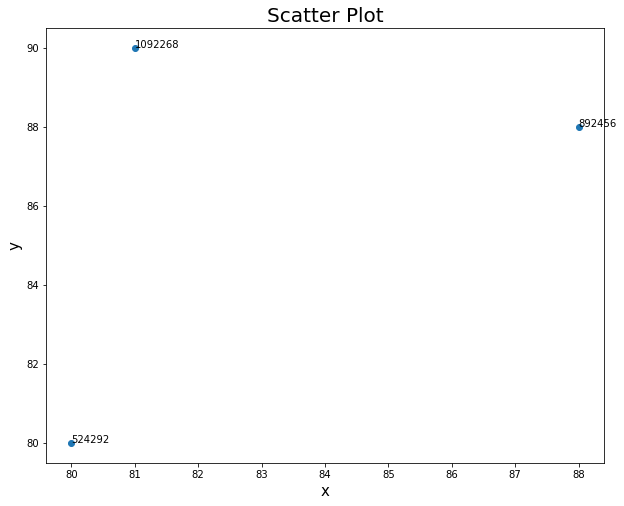

In [609]:
import random
import sys
import array
import matplotlib.pyplot as plt

test = {1092268: [81, 90], 524292: [80, 80], 892456: [88, 88]}

# repackage data into array-like for matplotlib 
# (see a preferred pythonic way below)
data = {"x":[], "y":[], "label":[]}
for label, coord in test.items():
    data["x"].append(coord[0])
    data["y"].append(coord[1])
    data["label"].append(label)

# display scatter plot data
plt.figure(figsize=(10,8))
plt.title('Scatter Plot', fontsize=20)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.scatter(data["x"], data["y"], marker = 'o')

# add labels
for label, x, y in zip(data["label"], data["x"], data["y"]):
    plt.annotate(label, xy = (x, y))

In [587]:
len('Категория лиц, испытывающих трудности:_') 

39

In [548]:
with open('professions.csv','w', encoding='utf-8') as file:
    file.write(str(atribute_distribution(atribute_1 = 22, atribute_2 = 40) 

4323553it [00:46, 92180.31it/s]


## Набор данных №2:

In [38]:
headlines_f2 =['Идентификатор строки','Источник подачи заявления', 'Код региона заявителя', 'Статус на момент формирования выгрузки', 'Причина снятия с учета', 'Код региона службы занятости населения', 'Признак отсутствия трудовой деятельности','Признак повторного заявления', 'Причина увольнения с последнего места работы', 'Наличие детей', 'Предпенсионер', 'Идентификатор пользователя', 'Работал в апреле 2019 года', 'Работал в мае 2019 года', 'Работал в июне 2019 года', 'Работал в июле 2019 года', 'Работал в августе 2019 года', 'Работал в сентябре 2019 года', 'Работал в октябре 2019 года', 'Работал в ноябре 2019 года', 'Работал в декабре 2019 года', 'Работал в январе 2020 года', 'Работал в феврале 2020 года', 'Работал в марте 2020 года', 'Работал в апреле 2020 года', 'Работал в мае 2020 года', 'Работал в июне 2020 года', 'Работал в июле 2020 года', 'Работал в августе 2020 года', 'Работал в сентябре 2020 года', 'Работал в октябре 2020 года', 'Средняя заработная плата за второй квартал 2019 года', 'Средняя заработная плата за второй квартал 2019 года', 'Средняя заработная плата за третий квартал 2019 года', 'Средняя заработная плата за четвертый квартал 2019 года', 'Средняя заработная плата за первый квартал 2020 года', 'Средняя заработная плата за второй квартал 2020 года', 'Средняя заработная плата за третий квартал 2020 года','Есть информация из резюме', 'Регион заявителя', 'Желаемая должность', 'Сфера деятельности', 'Уровень образования', 'Наличие водительского удостоверения', 'Опыт работы, лет', 'Ожидаемая заработная плата, рублей', 'Год рождения', 'Пол', 'Готовность к переобучению', 'Сумма выплат по пособию по безработице, рублей', 'Число дней между первой и последней выплатами пособия по безработице', 'Сумма выплат на детей', 'Месяц создания заявления', 'Неделя создания заявления', 'Месяц, в который принято решение о признании безработным', 'Неделя, в которую принято решение о признании безработным', 'Месяц трудоустройства', 'Неделя трудоустройства', 'Месяц отзыва заявления', 'Неделя отзыва заявления', 'Месяц снятия с учета', 'Неделя снятия с учета', 'Месяц, в который было принято решение об отказе в назначении пособия', 'Неделя, в которую было принято решения об отказе в назначении пособия']

#расшифровка значений status на наборе данных №2
status_encode = {'APPROVED' : 'Назначено пособие',
'DELETED' : 'Заявление отозвано',
'EMPLOYED' : 'Трудоустроен',
'FILLING_APPLICATION' : 'Дозаполнение/редактирование сведений (по просьбе ЦЗН)',
'IN_PROGRESS' : 'Заявление зарегистрировано в центре занятости населения',
'JOB_OFFERED' : 'Предложены вакансии',
'NEW' : 'Новое заявление',
'NOT_APPROVED' : 'Отказано в пособии',
'REMOVED' : 'Снят с учета',
'REQUEST' : 'Запрос сведений',
'REREGISTRATION' : 'Перерегистрация'}

counter = 0
data_sample2_dict ={}

with open('unemployed_2_sample.csv', encoding='utf-8') as f2:
    for line in f2:
        if counter == 0: 
            head = line.strip().split(';')
        elif counter <2:
            dataline = line.strip().split(';')
        else:
            break
        counter+=1

for name, value in zip(headlines_f2, dataline):
    data_sample2_dict[name] = value
    print("{} : {}".format(name, value))
 

Идентификатор строки : 1588b058-ccea-409b-9190-19f54f425e43
Источник подачи заявления : EPGU
Код региона заявителя : 50
Статус на момент формирования выгрузки : REREGISTRATION
Причина снятия с учета : null
Код региона службы занятости населения : 50
Признак отсутствия трудовой деятельности : false
Признак повторного заявления : false
Причина увольнения с последнего места работы : По собственному желанию (инициативе работника)
Наличие детей : true
Предпенсионер : false
Идентификатор пользователя : a355587a-c614-e1a6-c293-e53269bf4f92
Работал в апреле 2019 года : null
Работал в мае 2019 года : null
Работал в июне 2019 года : null
Работал в июле 2019 года : false
Работал в августе 2019 года : false
Работал в сентябре 2019 года : false
Работал в октябре 2019 года : false
Работал в ноябре 2019 года : false
Работал в декабре 2019 года : false
Работал в январе 2020 года : false
Работал в феврале 2020 года : false
Работал в марте 2020 года : false
Работал в апреле 2020 года : false
Работал в м

#### Загрузим таблицу соответствия названий регионов значению ОКТМО:

In [43]:
region_code = {}
with open('regions.csv') as oktmo_regions:
    for line in oktmo_regions:
        line_list = line.strip().split(';')
        if 'OKTMO_ID' in line:
            continue
        else:
            
            region_code[int(line_list[0])] = [line_list[1], line_list[2]] 



print (region_code)

{1: ['Алтайский край', 'Сибирский федеральный округ'], 3: ['Краснодарский край', 'Южный федеральный округ'], 4: ['Красноярский край', 'Сибирский федеральный округ'], 5: ['Приморский край', 'Дальневосточный федеральный округ'], 7: ['Ставропольский край', 'Северо–Кавказский федеральный округ'], 8: ['Хабаровский край', 'Дальневосточный федеральный округ'], 9: ['Белгородская область', 'Центральный федеральный округ'], 10: ['Амурская область', 'Дальневосточный федеральный округ'], 11: ['Ненецкий автономный округ', 'Северо-Западный федеральный округ'], 12: ['Астраханская область', 'Южный федеральный округ'], 14: ['Белгородская область', 'Центральный федеральный округ'], 15: ['Брянская область', 'Центральный федеральный округ'], 17: ['Владимирская область', 'Центральный федеральный округ'], 18: ['Волгоградская область', 'Южный федеральный округ'], 19: ['Вологодская область', 'Северо-Западный федеральный округ'], 20: ['Воронежская область', 'Центральный федеральный округ'], 22: ['Нижегородская